In [21]:
using LinearAlgebra  #####Son las paqueterias que uso, para instalar una paqueteria basta colocar Pkg.add("Nombre_de_la_paqueteria")
using Plots
using SpecialFunctions: gamma
using Random, Distributions
using StatsBase
using Alert

In [22]:
function OUH(x0::Float64,t::AbstractArray,Δt::Float64,D::Float64,γ::Float64=1.0,cte::Float64=1.0) #Proceso de Ornstein–Uhlenbeck
    x=Vector{Float64}(undef, length(t)) #Definimos un vector lleno de basura para luego sobre escribir en el 
    x[1]=x0    #La primera entrada es la condicion inicial del Proceso de Ornstein–Uhlenbeck
    
    for i=1:length(t)-1                 #Usamos un for para poder hacer el proceso
        x0=x0-γ*Δt*(x0-cte)+(sqrt(2*D*Δt)*randn()) # Es el proceso de Ornstein–Uhlenbeck que depende del paso anterior 
        @inbounds x[1+i]=x0                 #@inbounds ignora si la lista tiene el tamaño adecuado y sobreescribimos en la lista basura
    end
    return x                          # Devolvemos la caminata de Ornstein–Uhlenbeck
end

OUH (generic function with 3 methods)

In [23]:
function radio_prom(tiradas::Int64)
    #Vamos a obtener el promedio en cada tiempo del radio
    A=[] #Usaremos un arreglo de arreglos de las diferentes tiradas
    for i=1:tiradas          #En el ciclo for produciremos varias tiradas
        K=OUH(k0,t,Δt,DK)   
        T=OUH(t0,t,Δt,DT,γ,cte1)
        push!(A,RADIO.(K,T))   # Colocamos en A los diferentes procesos de los radios
    end
    A=transpose(hcat(A...)) #lo convertimos a una matriz para facilitar el tratamiento
    #RAD=Float64[]  #colocaremos el 
    #for i=1:length(t)     #indexaremos del 1 hasta el último paso para hacer el promedio
    #    @inbounds Rm=mean(A[:,i]) #transpose "transpose(hcat(A...))" convierte el arreglo en una matriz para usar el "[:,i]" para usar las columnas de la matriz
    #    push!(RAD,Rm)
    #end
    RADVV=Vector{Float64}(undef, length(t))
    RADV=Vector{Float64}(undef, length(t))
    RAD=Vector{Float64}(undef, length(t))
    for i=1:length(t)
        @inbounds RAD[i]=mean(A[:,i])
        @inbounds RADV[i]=var(A[:,i],mean=RADIOM(t[i],γ,k0,t0,cte1))
        @inbounds RADVV[i]=var(A[:,i])
    end
    A=0
    return RAD, RADV, RADVV
end

radio_prom (generic function with 1 method)

In [24]:
RADIO(K::Float64,T::Float64)=K/(K^2+T^2)
RADIOM(t::Float64,γ,k0,t0,cte1)=(k0*exp(-t)+(1-exp(-t)))/((k0*exp(-t)+(1-exp(-t)))^2+(t0*exp(-γ*t)+cte1*(1-exp(-γ*t)))^2)

RADIOM (generic function with 2 methods)

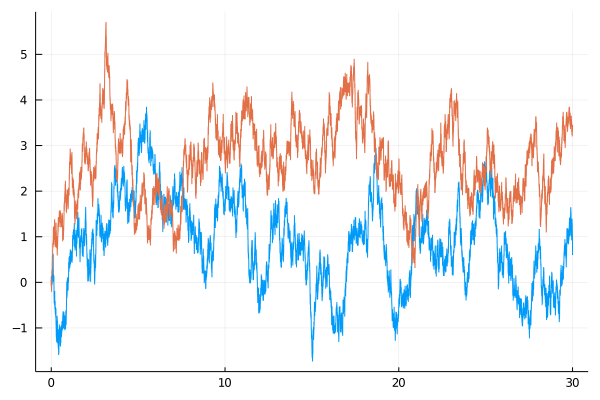

In [111]:
k0=0.01
t0=0.01

γ=1.0

DK=1.0
DT=1.0

N=30.0

Δt=0.001

t=0:Δt:N

cte1=3.0

K=OUH(k0,t,Δt,DK)
T=OUH(t0,t,Δt,DT,γ,cte1)
plot(t,K,legend=false)
plot!(t,T,legend=false)

In [116]:
@time RAD, RADV,RADVV=radio_prom(5000);
RADVV=sqrt.(RADVV)
RADV=sqrt.(RADV)
PASO=1
plot(t[PASO:end],RAD[PASO:end],color="red",lw = 1.5,xlabel="tiempo", ylabel="radio",ylims=(-0.5,0.5),ribbon=RADV,label="Promedio y Varainza")
plot!(t,RADIOM.(t,γ,k0,t0,cte1),color="black",lw = 2.0,label="Promedio teórico")
#plot!(t[PASO:end],RAD[PASO:end],color="blue",lw = 1.5,xlabel="tiempo [t]", ylabel="radio [m]",ylims=(0.2,0.25),ribbon=RADVV)
savefig("./Radios.png")

 14.626895 seconds (687.50 k allocations: 7.840 GiB, 34.18% gc time)


In [77]:
###SOLO PARA GRAFICAR
PASO=1
plot(t[PASO:end],RADIO.(K,T)[PASO:end],legend=false)
A=[]

tiradas=10
for i=1:tiradas
    K=OUH(k0,t,Δt,DK)
    T=OUH(t0,t,Δt,DT,γ,cte1)
    push!(A,RADIO.(K,T))
    plot!(t[PASO:end],A[i][PASO:end])
    #savefig("./Prueba.png")
end

plot!(t[PASO:end],RAD[PASO:end],color="red",lw = 1.5,xlabel="tiempo", ylabel="radio",ribbon=RADV*3)
plot!(t,RADIOM.(t,γ,k0,t0,cte1),color="black",lw = 2.0,xlims=(0,30),ylims=(-5.0,5.0))
savefig("./Prueba.png")

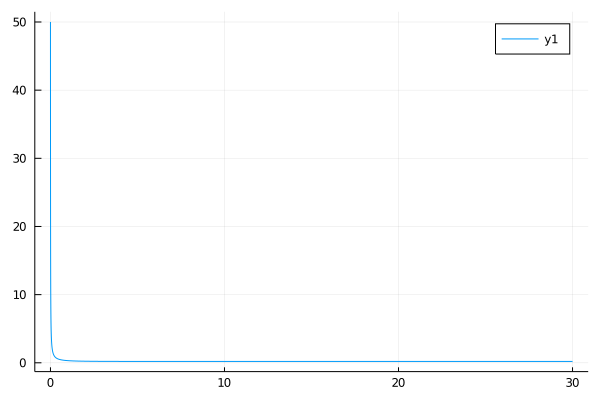

In [42]:
plot(t,RADIOM.(t,γ,k0,t0,cte1))

In [48]:
RADIOM.(t,γ,k0,t0,cte1)

30001-element Array{Float64,1}:
 50.0
 41.54736405436932
 35.35402421118111
 30.661513282154186
 27.004833784737617
 24.087323541162323
 21.71270873820405
 19.7468750234737
 18.09554296494545
 16.690761461564815
 15.48246627446708
 14.433046744904537
 13.513754815990444
  ⋮
  0.2000000000000189
  0.20000000000001888
  0.20000000000001883
  0.20000000000001883
  0.2000000000000188
  0.2000000000000188
  0.20000000000001877
  0.20000000000001877
  0.20000000000001872
  0.20000000000001872
  0.20000000000001872
  0.2000000000000187

In [10]:
var(a, mean=1000)

LoadError: UndefVarError: a not defined